<!DOCTYPE html>
<html>
<body>
<div align="center">
<h3>Made by Manthan A Panchal</h3>
    
<h1>Multinomial_Regression</h1>

<h3>Follow Me on - <a href="https://www.linkedin.com/in/manthan-panchal-046b3b198/">LinkedIn</a>&nbsp; 
</div>

</div>
</body>
</html>

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-darkgrid')
pd.set_option('display.max_rows', None)

In [ ]:
Regression Algorithm can only be run on continuous 

In [183]:
rdf = pd.read_excel('ToyotaCorolla2.xlam')
cols = ["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]
df = rdf[cols]

In [136]:
df

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
5,12950,32,61000,90,2000,3,5,210,1170
6,16900,27,94612,90,2000,3,5,210,1245
7,18600,30,75889,90,2000,3,5,210,1245
8,21500,27,19700,192,1800,3,5,100,1185
9,12950,23,71138,69,1900,3,5,185,1105


In [137]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [138]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Gears',
       'Quarterly_Tax', 'Weight'],
      dtype='object')

In [139]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [140]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

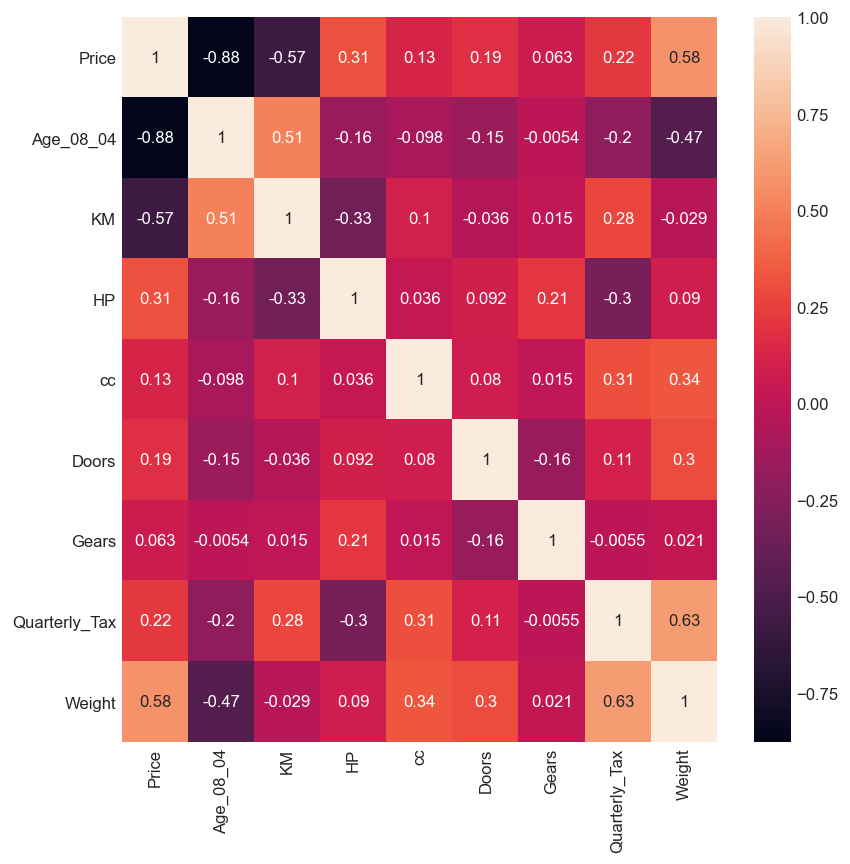

In [141]:
plt.figure(figsize=(8,8), dpi = 120)
sns.heatmap(df.corr(), annot=True)

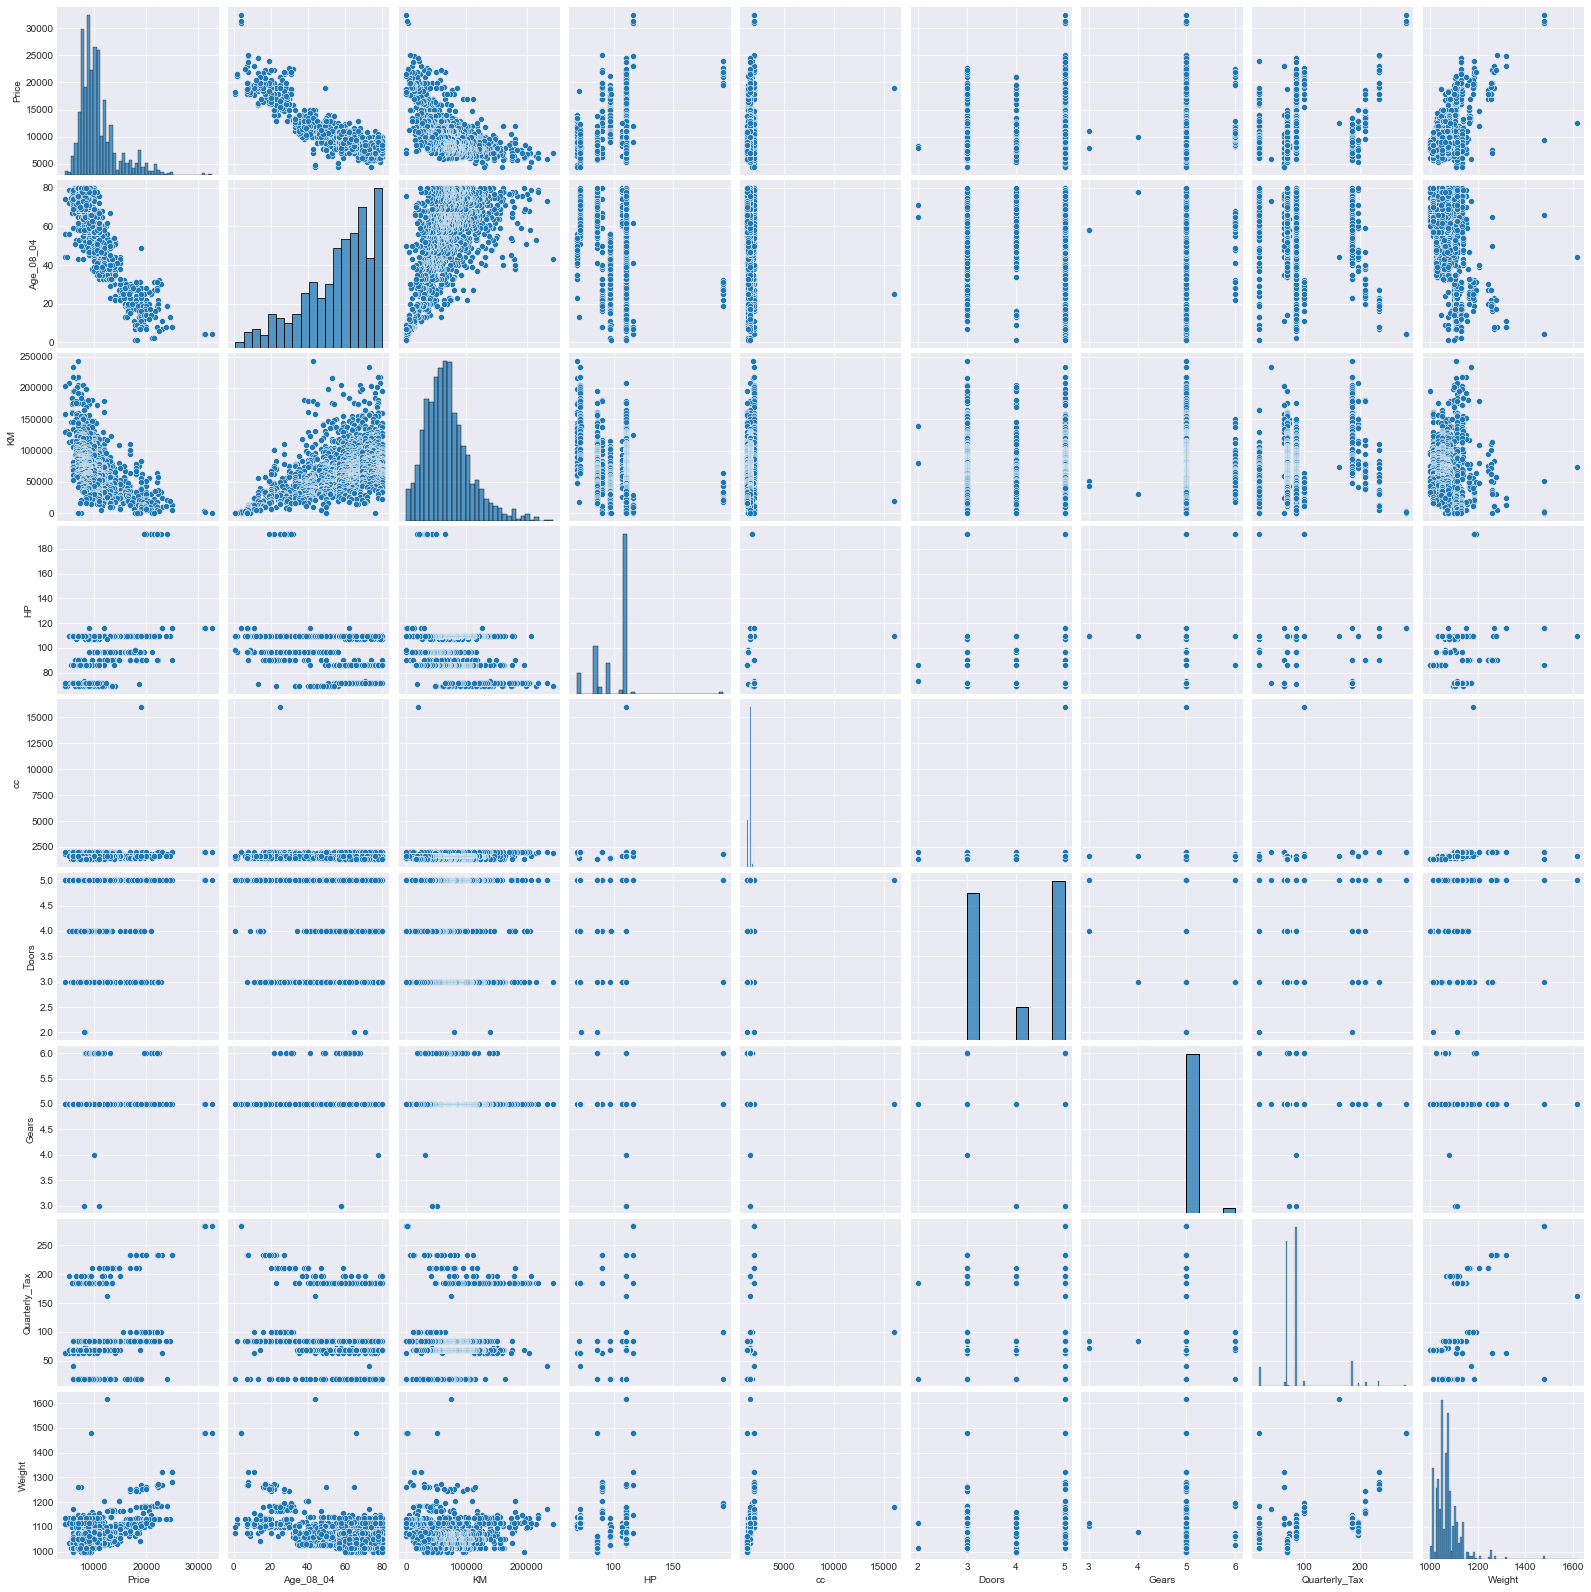

In [49]:
sns.pairplot(df)

In [142]:
model_1 = smf.ols("df.Price~Age_08_04 + KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data= df).fit()

In [144]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               df.Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:56:08   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age_08_04      -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [145]:
cc_model  = smf.ols("Price~cc", data  = df).fit()
cc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.55e-06
Time:                        20:56:43   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
doors_model  = smf.ols("Price~Doors", data=df).fit()
doors_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Fri, 05 Mar 2021   Prob (F-statistic):           1.46e-12
Time:                        20:56:50   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can conclude that the price is a desireable featutre

### Variance InflationFactor

In [61]:

rsq_Age_08_04 = smf.ols("Age_08_04~KM + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data= df).fit().rsquared
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_KM = smf.ols("KM ~ Age_08_04 + HP + cc + Doors + Gears + Quarterly_Tax + Weight", data= df).fit().rsquared
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols("HP ~ KM + Age_08_04 + cc + Doors + Gears + Quarterly_Tax + Weight", data= df).fit().rsquared
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols("cc ~ HP + KM + Age_08_04 + Doors + Gears + Quarterly_Tax + Weight", data= df).fit().rsquared
vif_cc = 1/(1-rsq_cc)

rsq_Doors = smf.ols("Doors ~ cc + HP + KM + Age_08_04 + Gears + Quarterly_Tax + Weight", data= df).fit().rsquared
vif_Doors = 1/(1-rsq_Doors)

rsq_Gears = smf.ols("Gears ~ Doors + cc + HP + KM + Age_08_04 + Quarterly_Tax + Weight", data= df).fit().rsquared
vif_Gears = 1/(1-rsq_Gears)

rsq_Quarterly_Tax = smf.ols("Quarterly_Tax ~ Gears + Doors + cc + HP + KM + Age_08_04 + Weight", data= df).fit().rsquared
vif_Quarterly_Tax = 1/(1-rsq_Quarterly_Tax)

rsq_Weight = smf.ols("Weight ~ Quarterly_Tax + Gears + Doors + cc + HP + KM + Age_08_04", data= df).fit().rsquared
vif_Weight = 1/(1-rsq_Weight)


In [68]:
VIF_dict = {
    'Features' : ['Age_08_04', 'KM', 'HP','cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight'],
                
    'Variance_inflation_factor' : [vif_Age_08_04, vif_KM, vif_HP, vif_cc, vif_Doors, vif_Gears, vif_Quarterly_Tax, vif_Weight]
}


Vif_df = pd.DataFrame(VIF_dict)
Vif_df

,Features,Variance_inflation_factor
0,Age_08_04,1.884620
1,KM,1.756905
2,HP,1.419422
3,cc,1.163894
4,Doors,1.156575
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X=df[['Age_08_04', 'KM', 'HP','cc', 'Doors', 'Gears', 'Quarterly_Tax', 'Weight']]
 
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
vif["features"] = X.columns
 
pd.DataFrame(vif)

,VIF Factor,features
0,16.392684,Age_08_04
1,7.590522,KM
2,64.894960,HP
3,17.199750,cc
4,21.874692,Doors
5,438.631804,Gears
6,11.020074,Quarterly_Tax
7,543.133076,Weight


### Gears and Weight have a large Variance Inflation Factor so we drop these columns

In [148]:
df = df.drop(['Gears', 'Weight'], axis=1)

In [149]:
model_2 = smf.ols("df.Price~Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax", data= df).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               df.Price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     1239.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        20:58:44   Log-Likelihood:                -12497.
No. Observations:                1436   AIC:                         2.501e+04
Df Residuals:                    1429   BIC:                         2.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.295e+04    409.080     31.660      0.000    1.21e+04    1.38e+04
Age_08_04      -136.5498      2.658    -51.366      0.000    -141.765    -131.335
KM               -0.0198      0.001    -14.578      0.000      -0.022      -0.017
HP               45.7327      2.858     16.000      0.000      40.126      51.339
cc                0.1028      0.097      1.063      0.288      -0.087       0.292
Doors           134.2946     41.299      3.252      0.001      53.281     215.308
Quarterly_Tax    16.3993      1.149     14.272      0.000      14.145      18.653
==============================================================================
Omnibus:                      202.288   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              717.719
Skew:                           0.665   Prob(JB):                    1.41e-156
Kurtosis:                       6.198   Cond. No.                     8.30e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Residual analysis

### QQplot

<Figure size 1000x600 with 0 Axes>

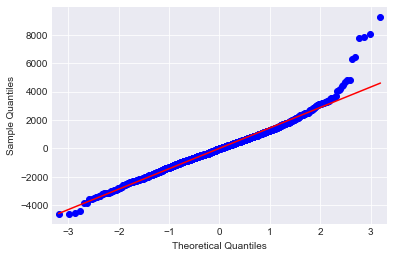

In [150]:
import statsmodels.api as sm
plt.figure(figsize=(10,6), dpi=100)

qqplot = sm.qqplot(model_2.resid, line = 'r')


### THE EXTREME HIGH VALUES ARE NOT NORMALLY DISTRIBUTED

### Residual plot to check heteroscediacity and homoscediasity

In [151]:
def get_standarsized_values(vals):
    return ((vals-vals.mean())/vals.std())

[]

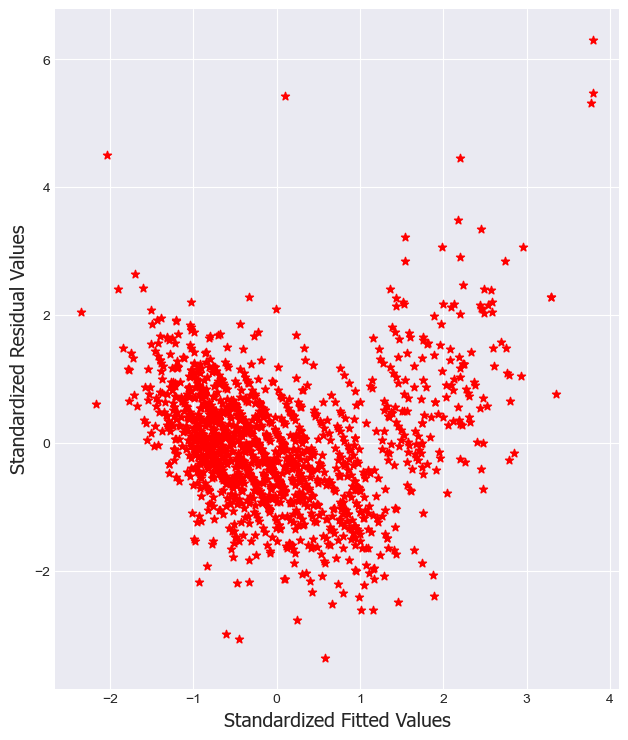

In [152]:
plt.figure(figsize=(16,9), dpi=100)

plt.subplot(1,2,1)
plt.scatter(get_standarsized_values(model.fittedvalues),  get_standarsized_values(model.resid),color = 'r', marker='*')
plt.xlabel('Standardized Fitted Values', fontdict={'fontname':'Tahoma', 'fontsize':14})
plt.ylabel('Standardized Residual Values', fontdict={'fontname':'Tahoma', 'fontsize':14})
plt.plot()

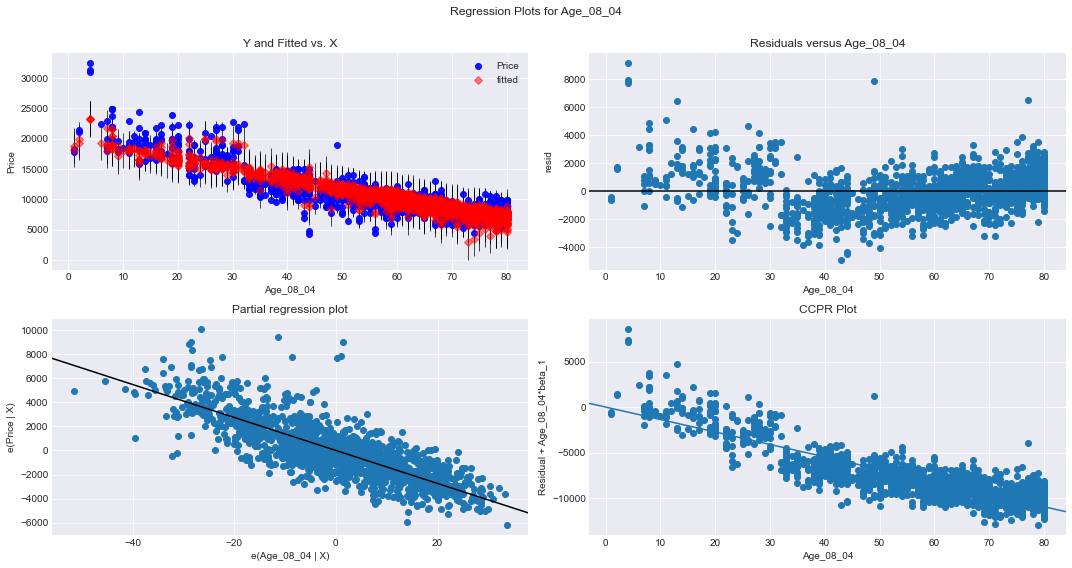

In [153]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

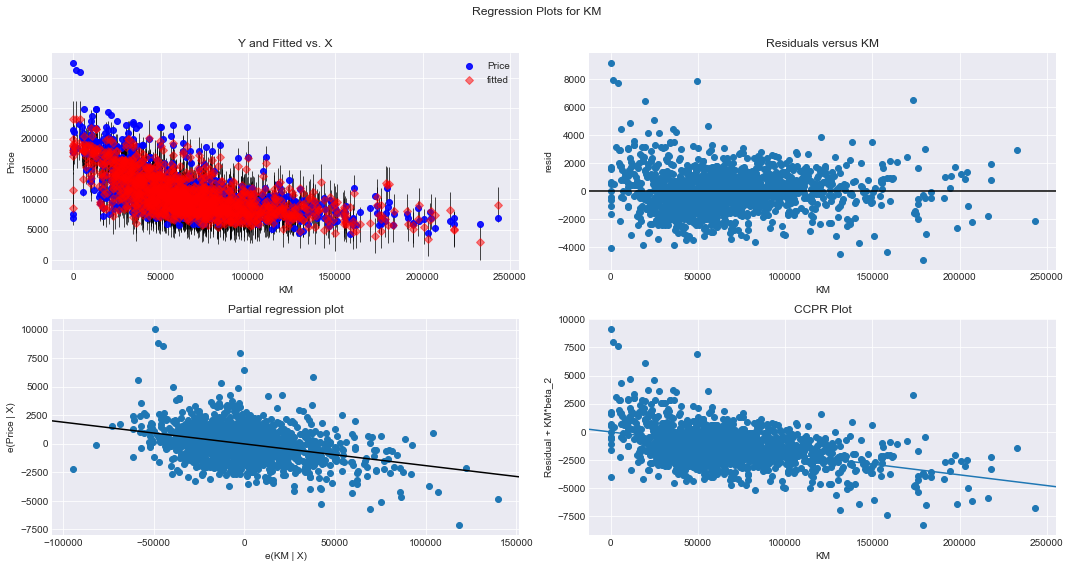

In [154]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

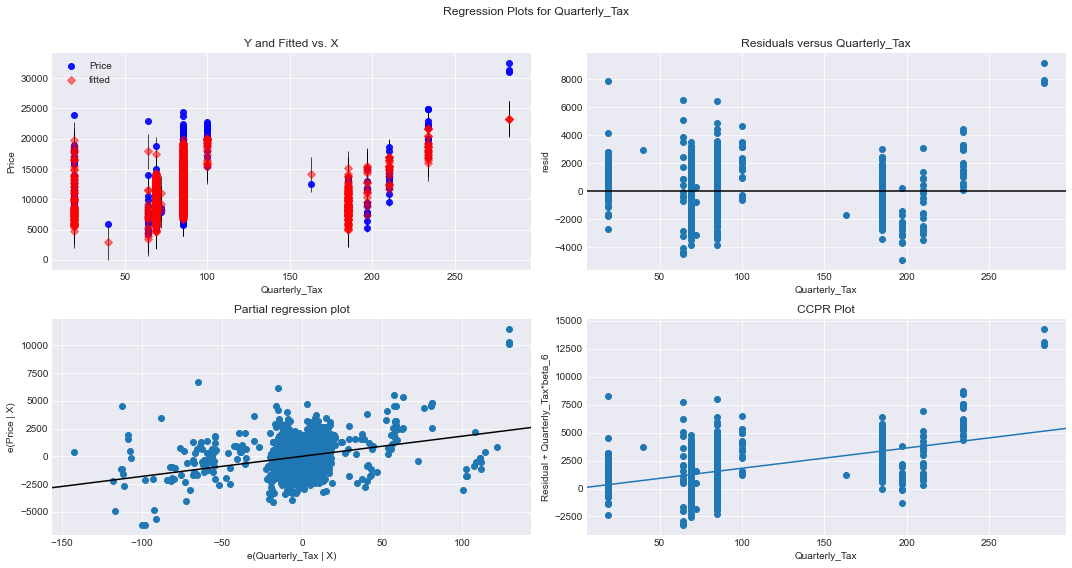

In [155]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Quarterly_Tax", fig=fig)
plt.show()

#### we can notice some heteroscedasticity in the plots to further adress that we use

### Model Deletion Diagnostics

#### to detect outliers and influencers

In [161]:
model_influence = model_2.get_influence()
cd, n = model_influence.cooks_distance

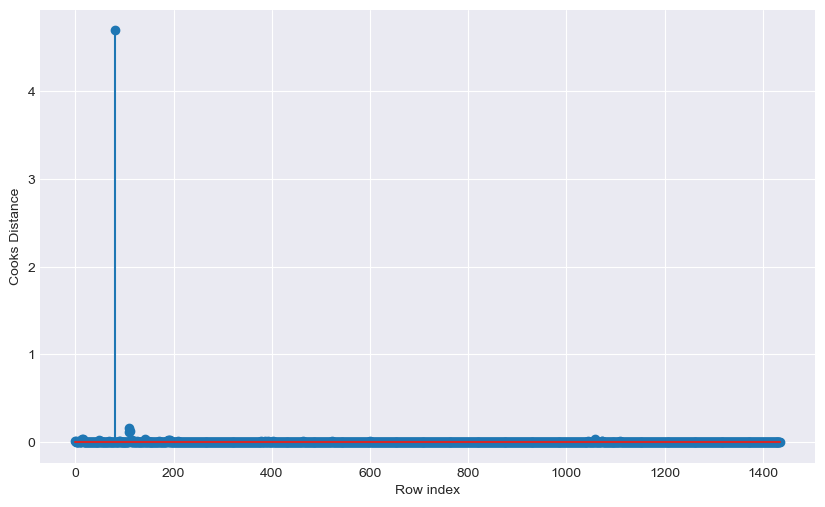

In [162]:
plt.figure(figsize=(10,6), dpi=100)

plt.stem(np.arange(len(df)), np.round(cd, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [166]:
cooks_distance_threshold = 4/df.shape[0]
cooks_distance_threshold

0.002785515320334262

In [169]:
index = list()
for i in np.arange(cd.shape[0]):
    if(cd[i])>(0.002785515320334262):
        print('row number {} has value {} which is greater then cutoff'.format(i, cd[i]))
        index.append(i)

row number 0 has value 0.008890694970601234 which is greater then cutoff
row number 1 has value 0.005146635009630385 which is greater then cutoff
row number 2 has value 0.006786668294526311 which is greater then cutoff
row number 4 has value 0.004599944634776352 which is greater then cutoff
row number 5 has value 0.004298010836284143 which is greater then cutoff
row number 7 has value 0.005872296747781666 which is greater then cutoff
row number 8 has value 0.006113524339529671 which is greater then cutoff
row number 9 has value 0.0033217295831911016 which is greater then cutoff
row number 13 has value 0.011586066659458874 which is greater then cutoff
row number 14 has value 0.030305498941689525 which is greater then cutoff
row number 15 has value 0.011651468403079278 which is greater then cutoff
row number 16 has value 0.029962575167776777 which is greater then cutoff
row number 45 has value 0.0029621650598531447 which is greater then cutoff
row number 49 has value 0.024225802872171225

In [172]:
new_df = df.drop(df.index[index], axis= 0).reset_index()
new_df

,index,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax
0,3,14950,26,48000,90,2000,3,210
1,6,16900,27,94612,90,2000,3,210
2,10,20950,25,31461,192,1800,3,100
3,11,19950,22,43610,192,1800,3,100
4,12,19600,25,32189,192,1800,3,100
5,17,17950,24,21716,110,1600,3,85
6,18,16750,24,25563,110,1600,3,19
7,19,16950,30,64359,110,1600,3,85
8,20,15950,30,67660,110,1600,3,85
9,21,16950,29,43905,110,1600,3,100


In [173]:
new_df.drop(['index'], axis=1, inplace=True)

In [174]:
new_df.head(5)

,Price,Age_08_04,KM,HP,cc,Doors,Quarterly_Tax
0,14950,26,48000,90,2000,3,210
1,16900,27,94612,90,2000,3,210
2,20950,25,31461,192,1800,3,100
3,19950,22,43610,192,1800,3,100
4,19600,25,32189,192,1800,3,100


In [175]:
new_df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Quarterly_Tax'], dtype='object')

###  Model_3

In [178]:
model_3  = smf.ols('Price ~ Age_08_04 + KM + HP + cc + Doors + Quarterly_Tax', data=new_df).fit()

In [179]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     1344.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:05:32   Log-Likelihood:                -11505.
No. Observations:                1356   AIC:                         2.302e+04
Df Residuals:                    1349   BIC:                         2.306e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.474e+04    404.087     36.481      0.000    1.39e+04    1.55e+04
Age_08_04      -132.9575      2.254    -58.991      0.000    -137.379    -128.536
KM               -0.0163      0.001    -13.062      0.000      -0.019      -0.014
HP               34.7866      3.348     10.389      0.000      28.218      41.355
cc               -0.6135      0.303     -2.023      0.043      -1.208      -0.019
Doors           134.2145     34.439      3.897      0.000      66.655     201.774
Quarterly_Tax    15.6418      1.592      9.825      0.000      12.519      18.765
==============================================================================
Omnibus:                        4.581   Durbin-Watson:                   1.533
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                4.496
Skew:                           0.120   Prob(JB):                        0.106
Kurtosis:                       3.147   Cond. No.                     9.67e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Trying decision tree 

In [185]:
from sklearn import tree
X = df.drop(['Price'], axis=1)
Y = df.Price
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, Y)

In [186]:
clf.feature_importances_

array([8.38358854e-01, 6.56698523e-02, 8.81330009e-03, 2.45826241e-03,
       3.29182427e-03, 5.80967620e-04, 8.54874705e-03, 7.22781923e-02])

In [187]:
for i,cols in enumerate(df.drop(['Price'], axis=1)):
    print('The feature importance for {} is {:.3f}'.format(cols,  clf.feature_importances_[i]))

The feature importance for Age_08_04 is 0.838
The feature importance for KM is 0.066
The feature importance for HP is 0.009
The feature importance for cc is 0.002
The feature importance for Doors is 0.003
The feature importance for Gears is 0.001
The feature importance for Quarterly_Tax is 0.009
The feature importance for Weight is 0.072


### cc , doors, gears have not  scores well so we drop them

In [188]:
model_4 = smf.ols('Price ~ Age_08_04 + KM + HP + Quarterly_Tax', data=new_df).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     1985.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:14:06   Log-Likelihood:                -11515.
No. Observations:                1356   AIC:                         2.304e+04
Df Residuals:                    1351   BIC:                         2.307e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.478e+04    358.955     41.178      0.000    1.41e+04    1.55e+04
Age_08_04      -133.6328      2.255    -59.262      0.000    -138.056    -129.209
KM               -0.0170      0.001    -14.039      0.000      -0.019      -0.015
HP               32.6081      2.757     11.829      0.000      27.200      38.016
Quarterly_Tax    13.8341      1.073     12.891      0.000      11.729      15.939
==============================================================================
Omnibus:                        4.921   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.085   Jarque-Bera (JB):                4.834
Skew:                           0.127   Prob(JB):                       0.0892
Kurtosis:                       3.145   Cond. No.                     8.54e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.54e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [191]:
model_dictionary = {
    "Model"            :["model_1","model_2","model_3","model_4"],
    "Model Details"    :["All attributes","Removing gears and weight","Removing outliers","Removing cc"],
    "R square values"  :[model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared],
    "Adjusted R square":[model_1.rsquared_adj,model_2.rsquared_adj,model_3.rsquared_adj,model_4.rsquared_adj],
    "AIC values"       :[model_1.aic,model_2.aic,model_3.aic,model_4.aic] 
}

model_tab = pd.DataFrame(model_dictionary)
model_tab

,Model,Model Details,R square values,Adjusted R square,AIC values
0,model_1,All attributes,0.863763,0.862999,24769.076640
1,model_2,Removing gears and weight,0.838742,0.838065,25007.193970
2,model_3,Removing outliers,0.856649,0.856011,23024.925709
3,model_4,Removing cc,0.854593,0.854162,23040.233828
